In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.array([[1, 0, 1, 1, 0, 0, 0, 0, 0, 0], #1번 유저의 1~10번 레시피 선호도
                [0, 1, 0, 0, 1, np.nan, 0, 0, 0, 1], #2번 유저
                [1, np.nan, 1, 1, 1, 0, 1, 0, 0, 0],
                [0, 1, 0, 0, 1, 1, 0, 1, 0, 1],
                [1, 1, 0, np.nan, 0, 0, 0, 0, 1, 0],
                [1, 0, 1, 0, 1, np.nan, 1, 1, 0, 0],
                [0, 0, 0, 1, 1, 0, 1, 0, 1, 1],
                [np.nan, 1, 0, 0, np.nan, 1, 0, 1, 0, 0],
                [0, np.nan, 0, 1, 0, 0, 0, 1, 0, 0],
                [1, 0, 0, 0, 1, 1, 0, 1, np.nan, 1], #10번 유저
                [1, 1, 1, 0, 0, 1, 1, 1, 1, 1],
                [0, np.nan, np.nan, np.nan, 1, np.nan, 1, 1, np.nan, np.nan],
                [0, 0, 0, 0, 1, 0, 1, np.nan, 0, 1],
                [1, np.nan, 0, 0, np.nan, 1, 1, 0, 1, 1]]) 

(array([[-0.17,  0.22, -0.02,  0.25,  0.85],
        [ 0.3 ,  0.18,  0.73,  0.21, -0.04],
        [ 0.  ,  0.57,  0.4 , -0.05,  1.06],
        [ 0.24,  0.54,  0.81,  0.6 , -0.16],
        [ 0.27, -0.46,  0.07,  0.79,  0.91],
        [ 0.08,  1.16,  0.19,  0.31,  0.48],
        [ 0.7 ,  0.02,  0.63, -0.23,  0.58],
        [-0.07,  0.4 ,  0.23,  0.89, -0.07],
        [-0.35, -0.05,  0.72,  0.88,  0.39],
        [ 0.84,  0.51,  0.02,  0.58,  0.06],
        [ 0.37,  0.85,  0.27,  0.86,  0.48],
        [ 0.24,  0.84,  0.86,  0.21,  0.05],
        [ 0.36,  0.43,  0.7 , -0.42,  0.15],
        [ 1.03,  0.56,  0.07, -0.05,  0.29]]),
 array([[ 0.45, -0.2 , -0.45,  0.02,  0.79,  0.55,  0.32, -0.09,  1.16,
          1.  ],
        [ 0.51, -0.35,  0.78, -0.7 ,  0.46,  0.72,  0.68,  0.63, -0.27,
          0.15],
        [-0.67,  0.88, -0.26,  0.4 ,  0.71, -0.09,  0.3 ,  0.25, -0.25,
          0.75],
        [ 0.42,  1.05, -0.06,  0.23, -0.29,  0.63, -0.47,  0.81,  0.4 ,
          0.02],
        [ 0.

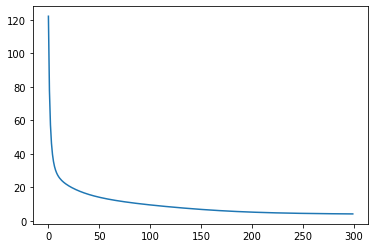

In [3]:
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

def predict(Theta, X): #행렬곱으로 예측값 계산하는 함수
    return Theta @ X

def cost(prediction, R): #손실함수(비용함수) 평균제곱오차(MSE) 계산
    return np.nansum((prediction - R)**2)

def initialize(R, num_features): #랜덤값을 채워 임의의 theta, x를 만들어주는 함수
    num_users, num_items = R.shape    
    Theta = np.random.rand(num_users, num_features)
    X = np.random.rand(num_features, num_items)   
    return Theta, X

#평점 데이터 행렬 R, 유저 행렬 Theta, 레시피 행렬 X, 경사 하강 횟수 iteration, 학습률 alpha, 그리고 정규화 상수 lambda_
def gradient_descent(R, Theta, X, iteration, alpha, lambda_):
    num_user, num_items = R.shape
    num_features = len(X) 
    costs = []  #손실계산값을 담을 리스트
    for _ in range(iteration):
        prediction = predict(Theta, X) #예측값 계산
        error = prediction - R #오차 계산
        costs.append(cost(prediction, R)) #손실을 costs 리스트에 추가

        for i in range(num_user):
            for j in range(num_items):
                if not np.isnan(R[i][j]): #실제 데이터 평점이 없는값은 건너뛰기
                    for k in range(num_features):
                        Theta[i][k] -= alpha * (np.nansum(error[i, :]*X[k, :]) + lambda_*Theta[i][k])
                        X[k][j] -= alpha * (np.nansum(error[:, j]*Theta[:, k]) + lambda_*X[k][j])
                        
    return Theta, X, costs


R = data        
Theta, X = initialize(R, 5)  #행렬들 초기화
Theta, X, costs = gradient_descent(R, Theta, X, 300, 0.001, 0.01)  #경사 하강
    
plt.plot(costs)

Theta, X

In [4]:
result = Theta @ X
print('기존 data:\n', data)
print('머신러닝으로 추측:\n', result)

기존 data:
 [[ 1.  0.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1. nan  0.  0.  0.  1.]
 [ 1. nan  1.  1.  1.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  1.  1.  0.  1.  0.  1.]
 [ 1.  1.  0. nan  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  1.  0.  1. nan  1.  1.  0.  0.]
 [ 0.  0.  0.  1.  1.  0.  1.  0.  1.  1.]
 [nan  1.  0.  0. nan  1.  0.  1.  0.  0.]
 [ 0. nan  0.  1.  0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  1.  1.  0.  1. nan  1.]
 [ 1.  1.  1.  0.  0.  1.  1.  1.  1.  1.]
 [ 0. nan nan nan  1. nan  1.  1. nan nan]
 [ 0.  0.  0.  0.  1.  0.  1. nan  0.  1.]
 [ 1. nan  0.  0. nan  1.  1.  0.  1.  1.]]
머신러닝으로 추측:
 [[ 0.88  0.15  0.83  0.9  -0.01 -0.08  0.44  0.09  0.17 -0.32]
 [-0.21  0.74 -0.22  0.17  0.76  0.37  0.31  0.46  0.18  0.88]
 [ 0.89  0.04  1.07  1.    0.7  -0.04  1.11  0.1   0.12  0.18]
 [-0.05  1.11 -0.05 -0.11  0.82  0.88  0.31  1.06  0.11  0.97]
 [ 0.94  0.93  0.08  1.6  -0.06 -0.02 -0.08  0.07  1.07  0.08]
 [ 1.03  0.05  1.13 -0.09  0.7   0.88  0.98  0.88  0.03  0.3

In [5]:
num_user, num_items = data.shape
for i in range(num_user):
    for j in range(num_items):
        if np.isnan(data[i][j]):
            if result[i][j] > 0.5:
                print("%d 번 유저에게 추천하는 레시피: %d"%(i+1,j+1))

5 번 유저에게 추천하는 레시피: 4
6 번 유저에게 추천하는 레시피: 6
9 번 유저에게 추천하는 레시피: 2
10 번 유저에게 추천하는 레시피: 9
12 번 유저에게 추천하는 레시피: 2
12 번 유저에게 추천하는 레시피: 6
12 번 유저에게 추천하는 레시피: 10
14 번 유저에게 추천하는 레시피: 5
